## **Questions**
### 1) Demographic - customers background (ie gender, country etc)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
plt.style.use("fivethirtyeight")
%matplotlib inline

Upload the dataset

In [3]:
banking = pd.read_csv('./data/bank_dataset.csv')
banking.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
banking.shape

(10000, 14)

In [5]:
banking.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Checking if there is any null values

In [6]:
banking.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
banking.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

** 

In [8]:
import statsmodels.api as sm
Y=banking.CreditScore
X=banking.EstimatedSalary
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CreditScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01916
Date:                Sun, 24 Oct 2021   Prob (F-statistic):              0.890
Time:                        22:48:08   Log-Likelihood:                -59900.
No. Observations:               10000   AIC:                         1.198e+05
Df Residuals:                    9998   BIC:                         1.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             650.7617      1.940    335.407      0.000     646.958     654.565
EstimatedSalary -2.326e-06   1.68e-05     -0.138      0.890   -3.53e-05    3.06e-05
==============================================================================
Omnibus:                      132.939   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.242
Skew:                          -0.072   Prob(JB):                     5.10e-19
Kurtosis:                       2.574   Cond. No.                     2.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
banking.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace=True)

In [10]:
banking.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


visualise Exited customers by their demographic

In [11]:
#  plot the relationship between geography, gender, age, tenure ..... with Exited

banking

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


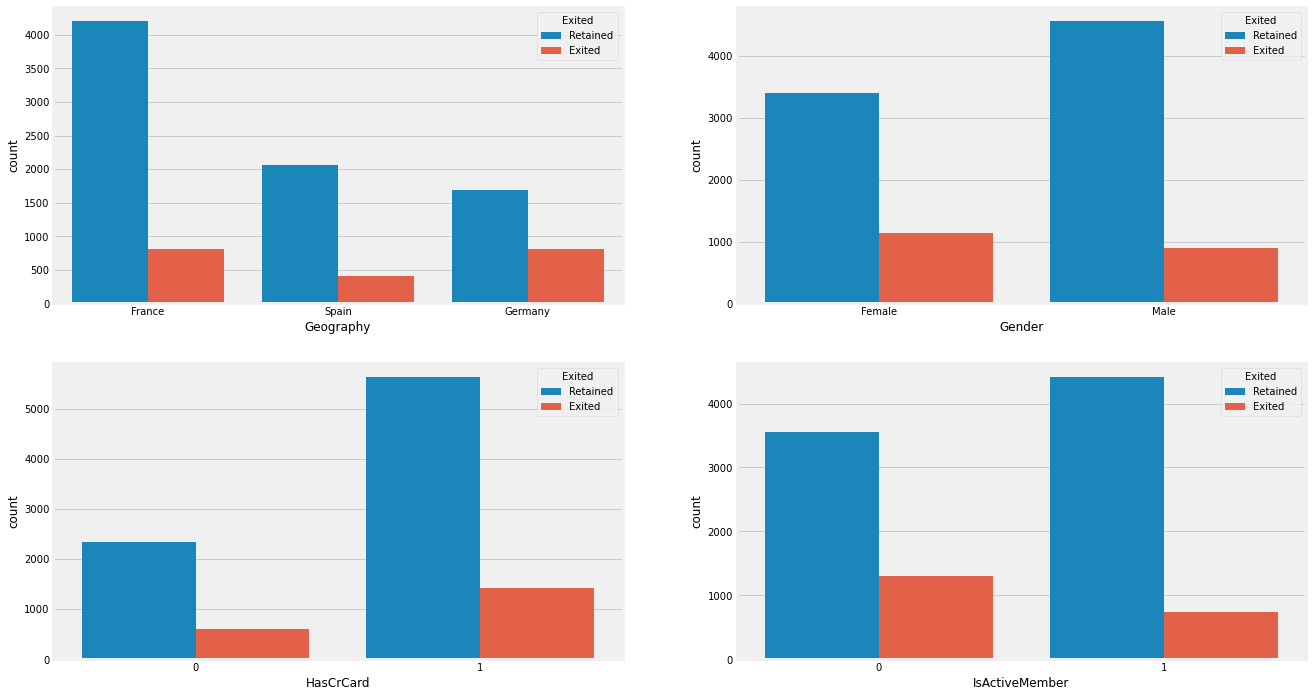

In [12]:
# banking.plot(kind='bar', x='EstimatedSalary', y='Exited', bins=10);

fig, axarr = plt.subplots(2, 2, figsize=(20, 12));

geography_plot = sns.countplot(x='Geography', hue = 'Exited',data = banking, ax=axarr[0][0])
geography_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

gender_plot = sns.countplot(x='Gender', hue = 'Exited',data = banking, ax=axarr[0][1])
gender_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

cc_plot = sns.countplot(x='HasCrCard', hue = 'Exited',data = banking, ax=axarr[1][0])
cc_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

active_plot = sns.countplot(x='IsActiveMember', hue = 'Exited',data = banking, ax=axarr[1][1])
active_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

plt.show()


In [13]:
banking.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


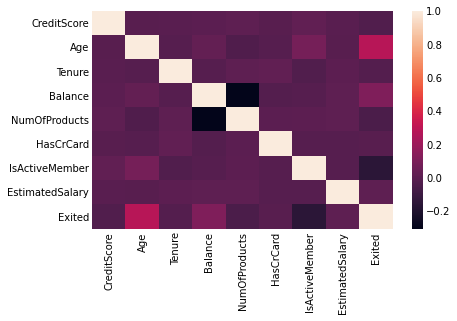

In [14]:
sns.heatmap(banking.corr());

In [15]:
banking.Exited.value_counts()

# 0 = Not Exited; 1 = Exited

0    7963
1    2037
Name: Exited, dtype: int64

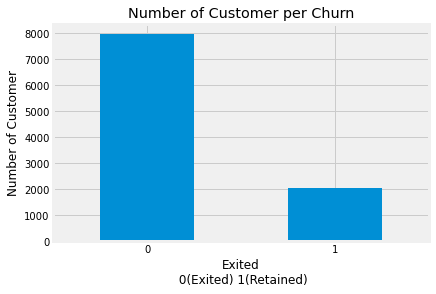

In [16]:
count_Exited = banking.Exited.value_counts()
count_Exited.plot(kind='bar')
plt.xlabel('Exited\n 0(Exited) 1(Retained)')
plt.xticks(rotation=0)
plt.ylabel('Number of Customer')
plt.title('Number of Customer per Churn')
plt.show()

In [17]:
banking.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


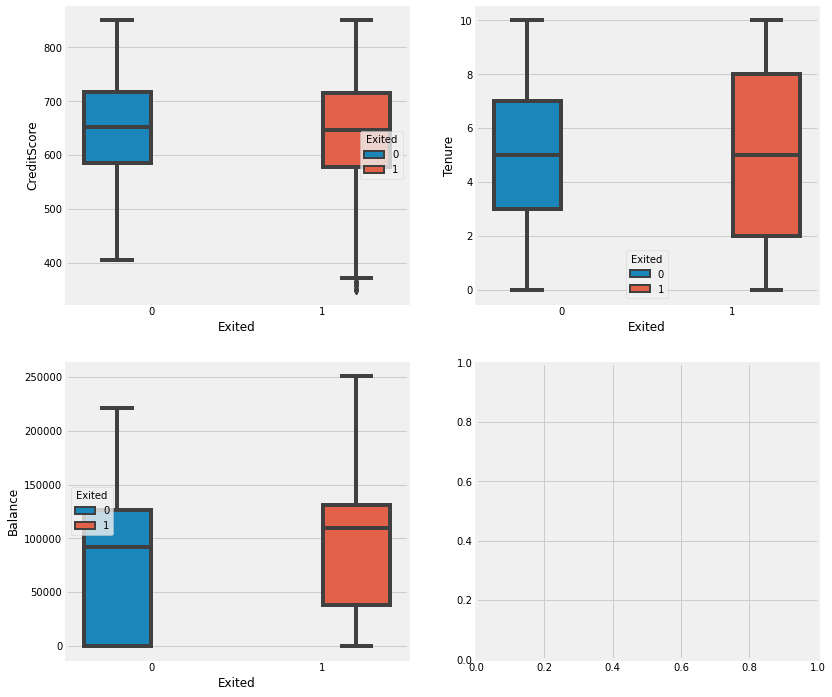

In [18]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 12));

cc_plot = sns.boxplot(x= 'Exited' ,y='CreditScore', hue = 'Exited', data = banking, ax=axarr[0][0])
#cc_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

active_plot = sns.boxplot(x= 'Exited', y='Tenure', hue = 'Exited',data = banking, ax=axarr[0][1])
#active_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

active_plot2 = sns.boxplot(x= 'Exited', y='Balance', hue = 'Exited',data = banking, ax=axarr[1][0])
#active_plot2.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

plt.show()

In [19]:
# Seaborn scatterplot with regression line
banking.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [20]:
banking.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
Gender = banking.groupby('Gender')

In [22]:
Gender.describe()

CreditScore                                                            \
             count        mean        std    min    25%    50%    75%    max   
Gender                                                                         
Female      4543.0  650.831389  96.787350  350.0  584.0  652.0  717.0  850.0   
Male        5457.0  650.276892  96.549706  350.0  583.0  651.0  718.0  850.0   

           Age             ... EstimatedSalary             Exited            \
         count       mean  ...             75%        max   count      mean   
Gender                     ...                                                
Female  4543.0  39.238389  ...       148963.12  199992.48  4543.0  0.250715   
Male    5457.0  38.658237  ...       149503.54  199953.33  5457.0  0.164559   

                                           
             std  min  25%  50%  75%  max  
Gender                                     
Female  0.433473  0.0  0.0  0.0  1.0  1.0  
Male    0.370816  0.0  0.0  0.0  0.0  1.0  

[2 rows x 72 columns]

In [23]:
banking.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [24]:
Gender.HasCrCard.value_counts()

Gender  HasCrCard
Female  1            3192
        0            1351
Male    1            3863
        0            1594
Name: HasCrCard, dtype: int64

In [25]:
Gender.Exited.value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

In [32]:
banking.groupby('Geography').Gender.value_counts().unstack()

Gender,Female,Male
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


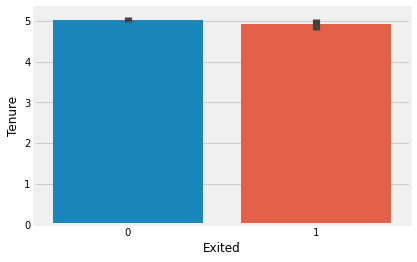

In [27]:
sns.barplot(data=banking, x='Exited', y='Tenure');

E:\Users\raden\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


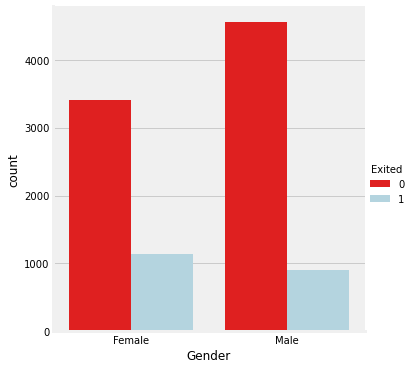

In [45]:

sns.catplot("Gender", hue="Exited", data=banking, kind="count", 
            palette={1:"lightblue", 0:"red"});



E:\Users\raden\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


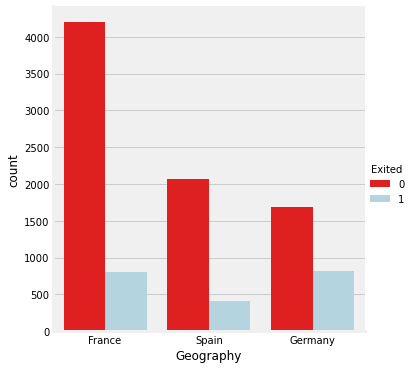

In [46]:
sns.catplot("Geography", hue="Exited", data=banking, kind="count", 
            palette={1:"lightblue", 0:"red"});